# Accessing Data From csv File

In [2]:
import pandas as pd

dataset = pd.read_csv("dataset.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


# Encoding variables and categorizing them using LabelEncoder and OneHotVariable for Course instructor and Course

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoderX = LabelEncoder()
x[:, 0] = encoderX.fit_transform(x[:, 0])
encoderY = LabelEncoder()
y = encoderY.fit_transform(y)

oneHotEncoder = OneHotEncoder(categorical_features=[1,2])
x = oneHotEncoder.fit_transform(x).toarray()

c:\users\yaswanth thaluri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\yaswanth thaluri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Splitting Data for Training and Testing

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

# Feature Scaling the Independent Variables

In [6]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
xtrain = scX.fit_transform(xtrain)
xtest = scX.transform(xtest)

Creating two empty lists to find the maximum C Value in the range of -100 to 100

In [7]:
bestC = []
c = []

# Training the Model and Predicing for Different C Values

In [8]:
from sklearn.linear_model import LogisticRegression

i = 0.1
while i<100:
    classifier = LogisticRegression(C=i, solver="newton-cg", multi_class="multinomial", random_state=0)
    classifier.fit(xtrain, ytrain)
    
    ypred = classifier.predict(xtest)
   
    from sklearn.metrics import accuracy_score
    
    bestC.append(accuracy_score(ytest, ypred))
    c.append(i)
    
    i = i+0.1

As C value should be > 0, we are finding the best C value between 0.1 to 100

# Finding the Maximum C obtained from result

In [9]:
maxm = max(bestC)
index = bestC.index(maxm)

Result Obtained

In [10]:
print("Best C = "+str(c[index])+" with Accuracy = "+str(maxm))

Best C = 0.30000000000000004 with Accuracy = 0.5434782608695652


In [11]:
import matplotlib.pyplot as plt

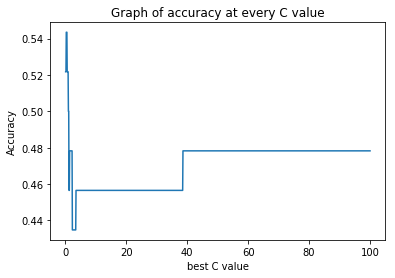

In [14]:
plt.plot(c, bestC)
plt.xlabel("best C value")
plt.ylabel("Accuracy")
plt.title("Graph of accuracy at every C value")
plt.show()

From the graph, we can see that for lesser C value the accuracy in prediction for model is High